# Case Study: Decision Tree Regressor 
- To predict the Pay Rate of Employees.

# 1. Import Libraries and load dataset

In [105]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display, Image
import graphviz as graph
from sklearn.preprocessing import FunctionTransformer

# 2. Print 10 samples from the dataset

In [2]:
import sys

!{sys.executable} -m pip install --upgrade --force-reinstall xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [10]:
!{sys.executable} -m pip install openpyxl 

     |████████████████████████████████| 242 kB 3.7 MB/s eta 0:00:01
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8917 sha256=6f89dc8f55c699e4e08961617e4a6604fbd6c0d050ae45cc1d5f92faf955768c
  Stored in directory: /Users/manjusri/Library/Caches/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile


In [71]:
emp_data = pd.read_excel('HRDataset_v13.xlsx', engine='openpyxl')
emp_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1103024456,1,1,0,1,1,3,1,28.50,...,Admin Offices,Brandon R. LeBlanc,1,Diversity Job Fair,Fully Meets,2.04,2,6,2019-01-15,0.0
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,0,23.00,...,Admin Offices,Brandon R. LeBlanc,1,Website Banner Ads,Fully Meets,5.00,4,4,2019-01-17,0.0
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,0,29.00,...,Admin Offices,Brandon R. LeBlanc,1,Internet Search,Fully Meets,3.90,5,5,2019-01-18,0.0
3,"Howard, Estelle",1211050782,1,1,0,1,1,3,0,21.50,...,Admin Offices,Brandon R. LeBlanc,1,Pay Per Click - Google,Fully Meets,3.24,3,4,NaT,NaN
4,"Singh, Nan",1307059817,0,0,0,1,1,3,0,16.56,...,Admin Offices,Brandon R. LeBlanc,1,Website Banner Ads,Fully Meets,5.00,3,5,2019-01-15,0.0


# 3. Data Description, Shape of data, name of columns, check for null values, check the number of values corresponding to genders.

In [72]:
emp_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EmpID,310.0,1.199745e+09,1.829600e+08,6.020003e+08,1.101024e+09,1.203032e+09,1.378814e+09,1.988300e+09
MarriedID,310.0,3.967742e-01,4.900194e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
MaritalStatusID,310.0,8.096774e-01,9.447024e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
GenderID,310.0,4.290323e-01,4.957382e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
EmpStatusID,310.0,2.396774e+00,1.795533e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
DeptID,310.0,4.606452e+00,1.082349e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
PerfScoreID,310.0,2.983871e+00,5.771242e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
FromDiversityJobFairID,310.0,9.354839e-02,2.916702e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PayRate,310.0,3.128481e+01,1.538362e+01,1.400000e+01,2.000000e+01,2.400000e+01,4.531500e+01,8.000000e+01
Termd,310.0,3.322581e-01,4.717845e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [73]:
emp_data.shape

(310, 35)

In [74]:
emp_data.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
PayRate                              float64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

In [75]:
emp_data.isnull().sum() 

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
PayRate                         0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       0
RecruitmentSource               0
PerformanceSco

<AxesSubplot:>

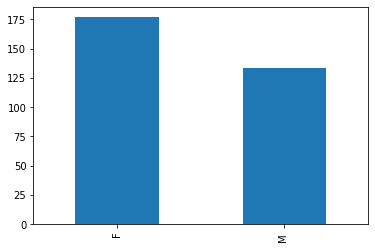

In [76]:
emp_data['Sex'].value_counts().plot(kind='bar')

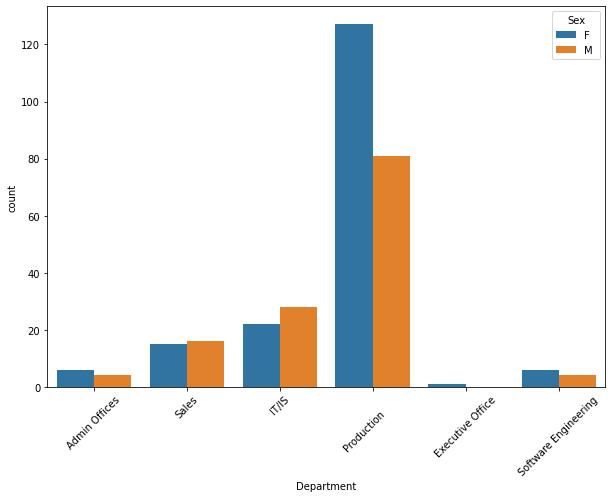

In [77]:
plt.figure(figsize=(10,7))
sns.countplot(emp_data['Department'], hue=emp_data['Sex'])
plt.xticks(rotation=45)
plt.show()

`No gender equality in production department, No Males in Executive Office`

<AxesSubplot:ylabel='RaceDesc'>

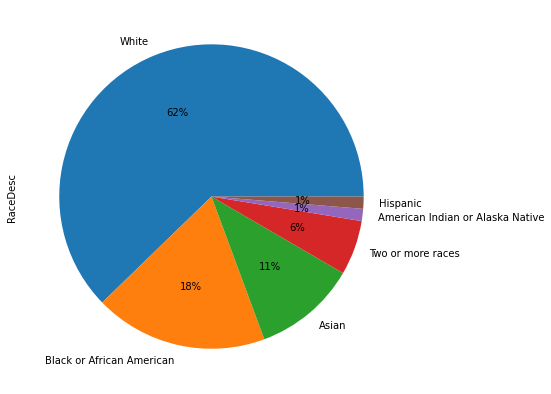

In [78]:
plt.figure(figsize=(10,7))
emp_data['RaceDesc'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [79]:
emp_data['DOB']

0     1987-11-24
1     1984-04-26
2     1986-09-01
3     1985-09-16
4     1988-05-19
         ...    
305   1952-01-18
306   1986-04-23
307   1983-02-09
308   1965-09-09
309   1978-05-02
Name: DOB, Length: 310, dtype: datetime64[ns]

In [80]:
today = pd.to_datetime('today')
today

Timestamp('2021-01-23 08:08:26.328174')

In [81]:
emp_data['age'] = today.year - emp_data['DOB'].dt.year
emp_data['age']

0      34
1      37
2      35
3      36
4      33
       ..
305    69
306    35
307    38
308    56
309    43
Name: age, Length: 310, dtype: int64

In [82]:
emp_data['exp_with_company'] = today.year - emp_data['DateofHire'].dt.year
emp_data['exp_with_company']

0      13
1       7
2       7
3       6
4       6
       ..
305     7
306     7
307     5
308     7
309     6
Name: exp_with_company, Length: 310, dtype: int64

In [83]:
emp_data['DateofTermination'] = (today.year - emp_data['DateofTermination'].dt.year)
emp_data['DateofTermination'].fillna(0, inplace=True)
emp_data['DateofTermination'].isnull().sum()

0

In [84]:
emp_data.drop(['DOB', 'DateofHire'], axis=1, inplace=True)

<AxesSubplot:xlabel='CitizenDesc', ylabel='count'>

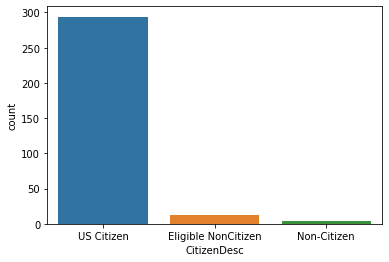

In [85]:
sns.countplot(emp_data['CitizenDesc'])

<AxesSubplot:xlabel='PayRate', ylabel='EmpSatisfaction'>

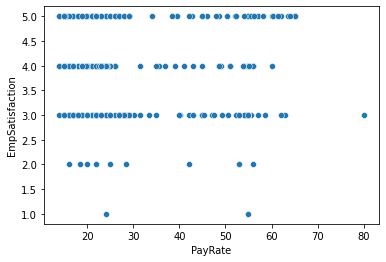

In [86]:
sns.scatterplot(emp_data['PayRate'], emp_data['EmpSatisfaction'])

In [87]:
emp_data['PositionID'], emp_data['Position']

(0       1
 1       1
 2       1
 3       2
 4       2
        ..
 305    28
 306    28
 307    28
 308    28
 309    28
 Name: PositionID, Length: 310, dtype: int64,
 0                  Accountant I
 1                  Accountant I
 2                  Accountant I
 3      Administrative Assistant
 4      Administrative Assistant
                  ...           
 305        Sr. Network Engineer
 306        Sr. Network Engineer
 307        Sr. Network Engineer
 308        Sr. Network Engineer
 309        Sr. Network Engineer
 Name: Position, Length: 310, dtype: object)

In [88]:
emp_data.drop('PositionID', axis=1, inplace=True)

In [89]:
emp_data['DeptID'], emp_data['Department']
emp_data.drop('DeptID', axis=1, inplace=True)

In [90]:
emp_data['Department'].unique()

array(['Admin Offices', 'Sales', 'IT/IS', 'Production       ',
       'Executive Office', 'Software Engineering'], dtype=object)

In [91]:
emp_data['MarriedID'], emp_data['Department']

(0      1
 1      0
 2      0
 3      1
 4      0
       ..
 305    1
 306    1
 307    1
 308    0
 309    0
 Name: MarriedID, Length: 310, dtype: int64,
 0      Admin Offices
 1      Admin Offices
 2      Admin Offices
 3      Admin Offices
 4      Admin Offices
            ...      
 305            IT/IS
 306            IT/IS
 307            IT/IS
 308            IT/IS
 309            IT/IS
 Name: Department, Length: 310, dtype: object)

# 4. Visualization using matplotlib and Seaborn

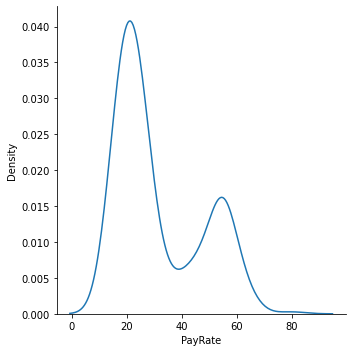

In [92]:
sns.displot(emp_data['PayRate'], kind='kde')

# 5. Which department pays more?

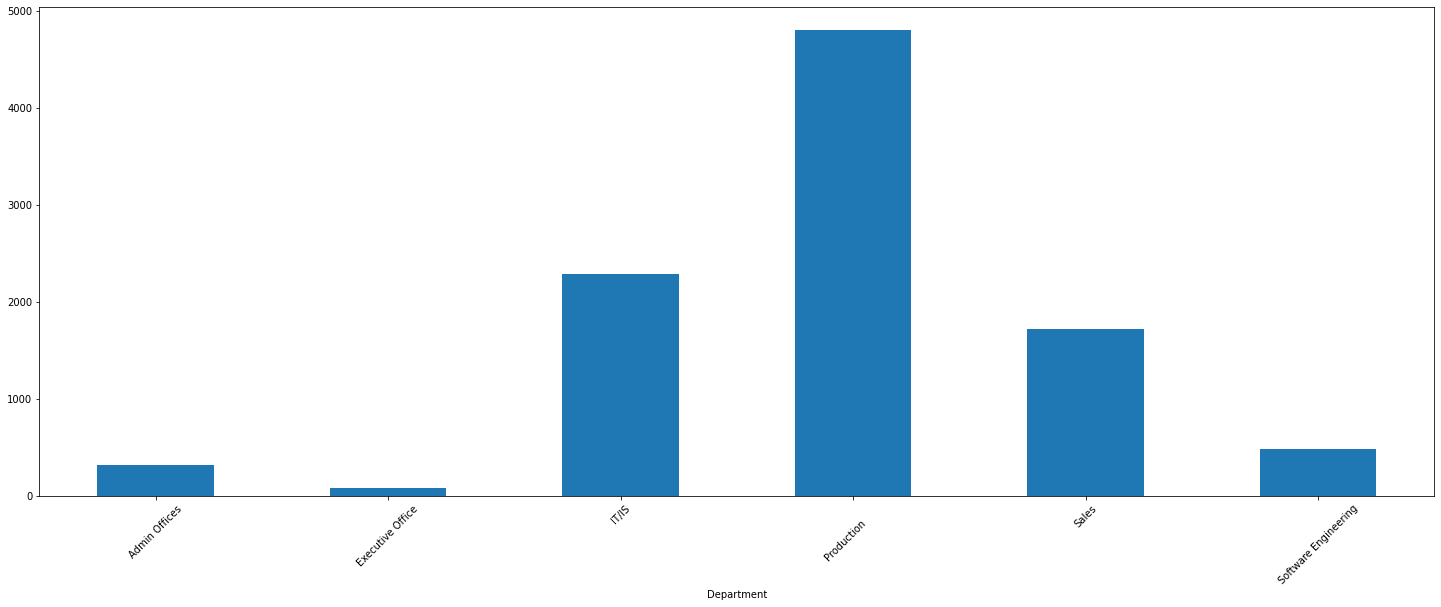

In [93]:
plt.figure(figsize=(25, 9))
emp_data.groupby('Department')['PayRate'].sum()
emp_data.groupby('Department')['PayRate'].sum().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

# 6. Which position is having the highest pay?

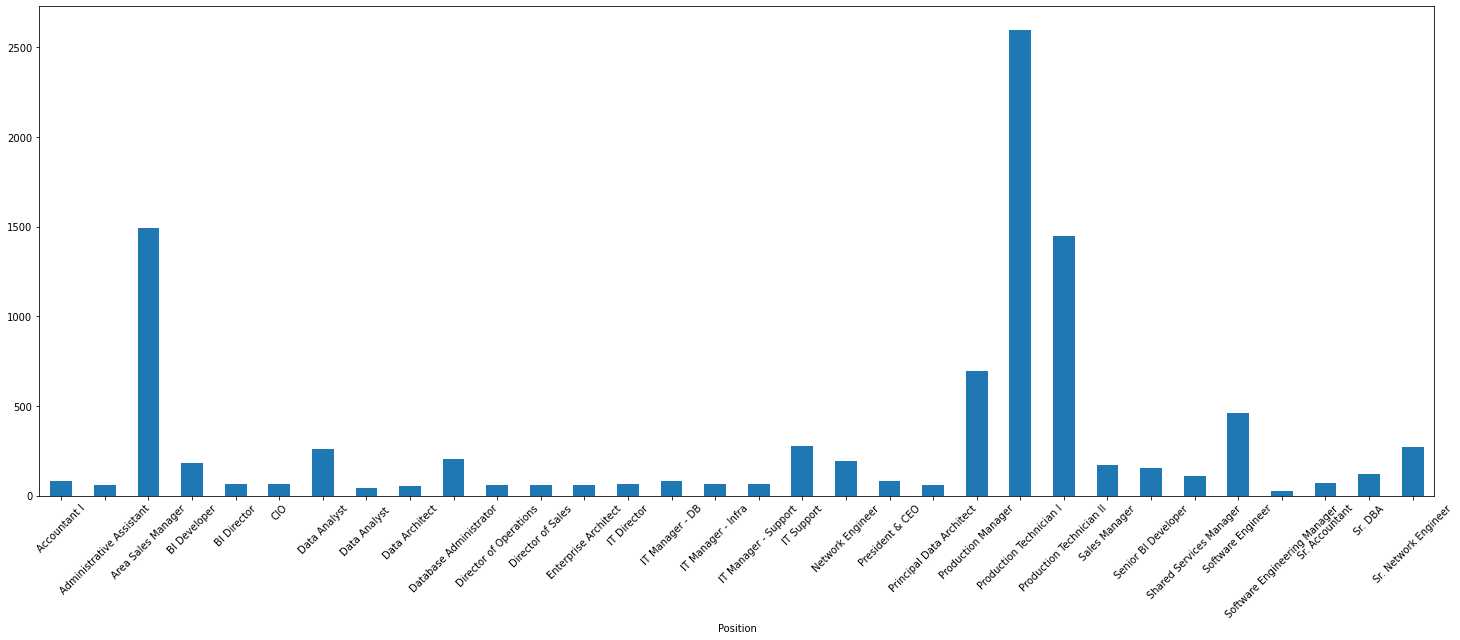

In [94]:
plt.figure(figsize=(25, 9))
emp_data.groupby('Position')['PayRate'].sum().plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

# 7. Drop the columns which are not relevant for model building.

In [95]:
emp_data.nunique()

Employee_Name                 310
EmpID                         310
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
PerfScoreID                     4
FromDiversityJobFairID          2
PayRate                        94
Termd                           2
Position                       32
State                          28
Zip                           158
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofTermination               8
TermReason                     17
EmploymentStatus                5
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource              23
PerformanceScore                4
EngagementSurvey              188
EmpSatisfaction                 5
SpecialProjectsCount            8
LastPerformanc

In [96]:
emp_data.drop(['Employee_Name', 'EmpID', 'Zip', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'ManagerID',
              'LastPerformanceReview_Date', 'DaysLateLast30'], axis=1, inplace=True)

In [97]:
emp_data.shape

(310, 23)

In [98]:
emp_data['HispanicLatino'].unique()
replaceStructure = {'No': 0, 'Yes': 1, 'yes':1, 'no':0}
emp_data['HispanicLatino'] = emp_data['HispanicLatino'].replace(replaceStructure)
emp_data['HispanicLatino'].unique()

array([0, 1])

# 8. Conversion of categorical values:

In [99]:
emp_data = pd.get_dummies(emp_data, drop_first=True)

In [100]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Columns: 151 entries, PerfScoreID to PerformanceScore_PIP
dtypes: float64(3), int64(8), uint8(140)
memory usage: 69.1 KB


# 9. Split the dataset in training and testing set in the ratio 75:25

In [101]:
X = emp_data.drop('PayRate', axis=1)
y = emp_data['PayRate']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

# 10. Use Decision Tree Regressor from sklearn library to train model.

In [102]:
dTree_reg = DecisionTreeRegressor(criterion='mse', random_state=1)
dTree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

# 11. Evaluate the model and use suitable metric to see how good the model is.

In [106]:
print(dTree_reg.score(X_train, y_train))
print(dTree_reg.score(X_test, y_test))
y_predict = dTree_reg.predict(X_test)
print('mean squared error: {}'.format(mean_squared_error(y_test, y_predict)))
print('r2_score: {}'.format(r2_score(y_test, y_predict)))

1.0
0.7448633151646304
mean squared error: 72.81792948717947
r2_score: 0.7448633151646304


# 12. Plot the Ground Truth vs the Predicted values.

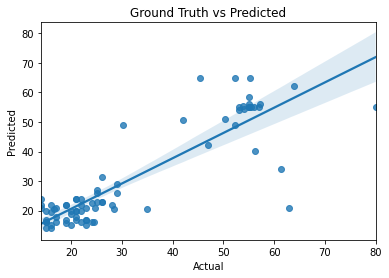

In [113]:
fig, ax = plt.subplots()
# ax.scatter(y_test, y_predict, edgecolors=(0,0,0))
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
sns.regplot(y_test, y_predict)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

# 13. Write conclusion

In [14]:
# write here